Amplicon data of two different marker genes from the same samples
========


##### GPU functionality
* CUDA/NVDA GPU was loaded and functions 
* Mac ARM/metal GPU device is functional

##### Bayesian distributions
* Hamiltonian/MCMC/NUTS functionality working
* SVI (Machine learning) functionality working

##### Next
* Current model works for 16s PCs (6) and only 1 18s PC. Predicting a matrix looks straight forward for SVI/Machine learning Bayesian. 


### Import all the dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import subprocess

In [8]:
import logging
import os

#import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as ran
import seaborn as sns
#from torch.distributions import constraints

#import pyro
#import pyro.distributions as dist
#import pyro.optim as optim

#pyro.set_rng_seed(1)
#assert pyro.__version__.startswith('1.8.4')

In [112]:
%matplotlib inline
plt.style.use('default')

logging.basicConfig(format='%(message)s', level=logging.INFO)
smoke_test = ('CI' in os.environ)
pyro.set_rng_seed(1)

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Test for cuda devise
torch.cuda.get_device_name(0)

'Quadro T2000'

### Move to working directory

In [4]:
os.chdir("/Users/nastassia.patin/GitHub/MarineDNA/Data")

## 01. This section imports the amplicon data sets as raw counts and calls an model the ASV occurrences as probability distributions. 

#### Import amplicon data sheets as pandas dataframes and take a look

In [56]:
file1 = "Flyer2018_16S_table_counts.tsv"
file2 = "Flyer2018_18S_table_counts.tsv"
asvs1 = pd.read_csv(file1, index_col=0, sep="\t")
asvs2 = pd.read_csv(file2, index_col=0, sep="\t")

In [57]:
asvs1.head(1)

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
495c1bd1608a1dad54d3e2824ce899ef,552,7415,8749,8152,7124,12422,215,8080,8799,2231,...,4324,1339,95,1554,147,2720,21,2015,1847,1886


In [7]:
asvs2.head(1)

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_1,1,0,3,0,0,3,0,1,7,2,...,7,2,3,2,1,2,1,2,5,4


### Function to model the ASV count distributions

#### Function to run R program on input data given the file name

In [80]:
def ranRelPct(row):
    return ran.betavariate(item, (row.sum() - item)) for item in row

SyntaxError: invalid syntax (<ipython-input-80-79340be2f71a>, line 2)

In [77]:
for row in asvs1.itertuples():
    ranRelPct(row)

TypeError: can only concatenate tuple (not "int") to tuple

In [76]:
def ranRelPct(df_raw):
    df = df_raw + 1
    df_modeled = df.apply(lambda x: ran.betavariate(x, (df.sum() - x)), axis=1)
    #df_modeled = df.T
    return(df_modeled)

SyntaxError: invalid syntax (<ipython-input-76-4114a9c88f46>, line 4)

#### Run the function in a loop over both amplicon data sets and make a list of two data frames

In [75]:
asvs1_modeled = ranRelPct(asvs1)
asvs1_modeled

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
df = []

for file in [file1, file2]:
    asvs = pd.read_csv(file, index_col=0, sep='\t')
    asvs_modeled = ranRelPct(asvs)
    df.append(asvs_modeled)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Separate the two data frames into the 16S and 18S modeled ASV counts and transpose for PCA

In [13]:
df_16S = df[0].T
df_18S = df[1].T

#### Perform a log-odds transform on the count probabilities (with natural log base e)

In [14]:
df_16S_logodds = np.log(df_16S/(1-df_16S))
df_18S_logodds = np.log(df_18S/(1-df_18S))

#### Add column and row names

In [15]:
df_16S_logodds.columns = list(asvs1.index)
df_16S_logodds.index = list(asvs1.columns)
df_18S_logodds.columns = list(asvs2.index)
df_18S_logodds.index = list(asvs2.columns)

In [16]:
df_16S_logodds.head(2)

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,-2.379618,-3.413049,-3.892599,-4.114643,-3.621366,-4.771026,-8.826672,-4.221232,-3.533882,-4.224973,...,-8.438473,-11.159609,-8.854615,-7.784126,-12.261399,-8.821641,-8.291717,-10.409917,-10.271330,-9.73318
CN18Fc19_5_eDNA,-1.584286,-3.054540,-2.989509,-3.105474,-3.177555,-4.497857,-5.175514,-4.287772,-4.041732,-3.866840,...,-9.280305,-10.525582,-10.756174,-11.342778,-9.597377,-10.380732,-10.735120,-12.023833,-10.804198,-9.98460


## 02. Reduce dimensionality and visualize principal components

In [17]:
from sklearn.decomposition import PCA
import seaborn as sns

#### From untransformed matrices

In [18]:
# Untransformed 16S
pca = PCA(n_components=62)
pca.fit_transform(df_16S)
variance_array_16S = np.cumsum(pca.explained_variance_ratio_ * 100)
#variance_array_16S

In [19]:
# Untransformed 18S
pca = PCA(n_components=62)
pca.fit_transform(df_18S)
variance_array_18S = np.cumsum(pca.explained_variance_ratio_ * 100)
#variance_array_18S

#### From log-odds transformed matrices

In [20]:
# Log-odds transformed 16S
pca = PCA(n_components=62)
pca.fit_transform(df_16S_logodds)
variance_array_16S_logodds = np.cumsum(pca.explained_variance_ratio_ * 100)
#variance_array_16S_logodds

In [21]:
# Log-odds transformed 18S
pca = PCA(n_components=62)
pca.fit_transform(df_18S_logodds)
variance_array_18S_logodds = np.cumsum(pca.explained_variance_ratio_ * 100)
#variance_array_18S_logodds

### Plot components vs variance explained

#### Based on the results above we will use the variances generated from the raw (untransformed) count probabilities

### Function to format variance numpy array for seaborn plot

In [22]:
def format_variance_data_for_plotting(variance_array):
    df = pd.DataFrame(variance_array, columns = ["Explained variance"])
    df = df.reset_index(level=0)
    df['index'] = df['index'] + 1
    df = df.rename(columns = {"index" : "Component number"})
    return(df)

#### Apply function to raw count probabilities

[Text(0.5, 1.0, 'Principal components of ASV count probabilities')]

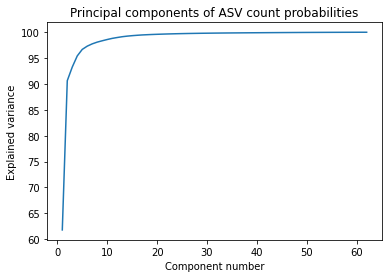

In [23]:
# 16S count data
df_variance = format_variance_data_for_plotting(variance_array_16S)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of ASV count probabilities') 

[Text(0.5, 1.0, 'Principal components of ASV count probabilities')]

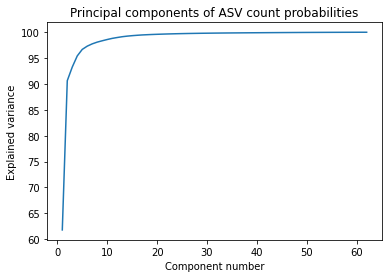

In [24]:
# 18S count data
df_variance = format_variance_data_for_plotting(variance_array_16S)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of ASV count probabilities') 

### Plot principal components of raw ASV count probabilities

[Text(0.5, 1.0, '16S PCA, raw count probabilities')]

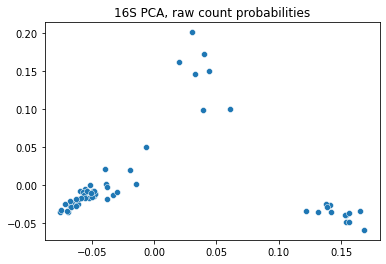

In [25]:
pca_16 = PCA(n_components=3)
pcs_16 = pca.fit_transform(df_16S)

pc1_values_16 = pcs_16[:,0]
pc2_values_16 = pcs_16[:,1]
sns.scatterplot(x=pc1_values_16, y=pc2_values_16).set(title="16S PCA, raw count probabilities")

[Text(0.5, 1.0, '18S PCA, raw count probabilities')]

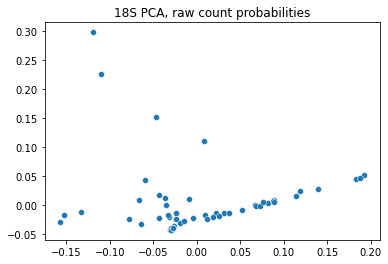

In [26]:
pca_118 = PCA(n_components=3)
pcs_18 = pca.fit_transform(df_18S)

pc1_values_18 = pcs_18[:,0]
pc2_values_18 = pcs_18[:,1]
sns.scatterplot(x=pc1_values_18, y=pc2_values_18).set(title="18S PCA, raw count probabilities")

## 03. Test the power of 16S data as a predictor for 18S data

### Function to extract defined number of PCs with sample labels

In [27]:
def extract_PCs_labeled(df_asvs_modeled, num_pcs):
    pca = PCA(n_components=num_pcs)
    pcs = pca.fit_transform(df_asvs_modeled)
    array = pcs[:, :num_pcs]
    cols = list()
    for i in range(1, num_pcs+1):
        n="PC%s" % i
        cols.append(n)
    df = pd.DataFrame(array, index=df_16S.index, columns = cols)
    return(df)

#### Export the first six PCs of the 16S data which explain 97% of the variance

In [28]:
pcs_16S = extract_PCs_labeled(df_16S, 6)
pcs_16S.to_csv("Flyer2018_16S_PCs.tsv", sep="\t")
pcs_16S

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.019770,0.019136,-0.022609,0.032085,-0.016938,0.002393
1,-0.075582,-0.035274,0.011893,-0.011759,0.003084,-0.002570
2,-0.047957,-0.015034,-0.003834,0.004006,-0.005752,0.004815
3,-0.066091,-0.023573,0.005607,-0.001656,-0.003994,0.004406
4,-0.059194,-0.007767,-0.004955,0.007041,-0.001561,0.002064
...,...,...,...,...,...,...
57,0.131571,-0.035466,0.003035,-0.001980,-0.002904,0.002884
58,0.032826,0.145323,-0.005767,0.014729,-0.030380,-0.016022
59,0.141986,-0.035707,0.004516,0.004242,-0.003731,-0.000304
60,0.137795,-0.024915,-0.000807,0.013549,-0.006080,-0.002214


#### Export the first two PCs of the 18S data for which we will test the 16S predictive power

In [29]:
pcs_18S = extract_PCs_labeled(df_18S, 2)
pcs_18S.to_csv("Flyer2018_18S_PCs.tsv", sep="\t")
pcs_18S

,PC1,PC2
0,-0.018953,-0.030264
1,-0.133258,-0.012462
2,-0.031701,-0.021340
3,-0.043022,-0.022798
4,-0.152336,-0.016428
...,...,...
57,-0.026814,-0.039018
58,-0.029659,-0.042521
59,-0.027383,-0.040227
60,-0.027266,-0.039972


## Run Pyro linear model

In [30]:
print(pcs_16S.columns.values)

['PC1' 'PC2' 'PC3' 'PC4' 'PC5' 'PC6']


In [135]:
df1 = pcs_16S[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
df1.columns = ['pc1_values_16', 'pc2_values_16','pc3_values_16', 'pc4_values_16', 'pc5_values_16', 'pc6_values_16']
df2 = pcs_18S[['PC1']]
df2.columns = ['pc1_values_18']
df = pd.merge(df1, df2, left_index=True, right_index=True)

In [31]:
df

[            0         1         2             3             4         5   \
 0     0.084740  0.170189  0.132108  1.521075e-01  1.324341e-01  0.123000   
 1     0.031890  0.045022  0.042726  3.879142e-02  3.050204e-02  0.048836   
 2     0.019985  0.047902  0.038496  4.107413e-02  4.272198e-02  0.023489   
 3     0.016069  0.042882  0.038870  4.188999e-02  4.221901e-02  0.034148   
 4     0.026049  0.040019  0.026671  3.491324e-02  3.302097e-02  0.024894   
 ...        ...       ...       ...           ...           ...       ...   
 2747  0.000147  0.000031  0.000018  5.273627e-06  2.366877e-06  0.000068   
 2748  0.000251  0.000022  0.000004  6.743164e-07  6.541731e-07  0.000017   
 2749  0.000030  0.000006  0.000002  1.895328e-05  9.307446e-06  0.000009   
 2750  0.000035  0.000020  0.000009  6.010918e-05  7.208667e-06  0.000013   
 2751  0.000059  0.000046  0.000026  3.394722e-05  1.323138e-06  0.000019   
 
             6         7             8         9   ...        52        53

## Below is the basic model. Each of the PCs have a normal distribution centered on zero (mean) with a variance in standard deviation. The 'model' function sets the priors for the model (parameters of interest). 'mean' is the expected value based on draws from those priors. 'a' is the intercept. 

In [137]:
def model(pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18):
    a = pyro.sample("a", dist.Normal(0., 100000.))
    b_PC1 = pyro.sample("b1", dist.Normal(0., 10000.))
    b_PC2 = pyro.sample("b2", dist.Normal(0., 10000.))
    b_PC3 = pyro.sample("b3", dist.Normal(0., 10000.))
    b_PC4 = pyro.sample("b4", dist.Normal(0., 10000.))
    b_PC5 = pyro.sample("b5", dist.Normal(0., 10000.))
    b_PC6 = pyro.sample("b6", dist.Normal(0., 10000.))
    sigma = pyro.sample("sigma", dist.Uniform(0., 10000.))

    mean = a + b_PC1 * pc1_values_16 + b_PC2 * pc2_values_16 + b_PC3 * pc3_values_16 + b_PC4 * pc4_values_16 + b_PC5 * pc5_values_16 + b_PC6 * pc6_values_16  

    ## Sampling from the distribution
    with pyro.plate("data", len(pc6_values_16)):
        # this is returning the likelihood. 'mean' here is the expected value, 'sigma' is the standard deviation from the normal
        return pyro.sample("obs", dist.Normal(mean, sigma), obs=pc1_values_18) 

## SVI and MCMC are two ways to create a posterior distribution. Below is the first (SVI) modeling approach. The autoguide uses ML to sample from the distribution. 

### Qs: How does this ML approach relate to the use of chains? How do we diagnose the convergence of posterior sampling? How do prediction error rates relate to chain convergence? We need to know that we have good sampling of the posterior distribution. Need to describe the model uncertainty fully and correctly.

### Q: How can we scale up this process? If we wanted to run it 10,000 times, what kind of processing power/architecture would we use?

In [156]:
from pyro.infer.autoguide import AutoMultivariateNormal, init_to_mean


guide = AutoMultivariateNormal(model, init_loc_fn=init_to_mean)

svi = SVI(model, 
          guide, 
          optim.Adam({"lr": .01}), # Adam is ML optimization tool
          loss=Trace_ELBO())

pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18 = train[:, 0], train[:, 1], train[:, 2], train[:, 3], train[:, 4], train[:, 5], train[:, 6]
pyro.clear_param_store()
for i in range(num_iters):
    elbo = svi.step(pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18)
    if i % 500 == 0:
        logging.info("Elbo loss: {}".format(elbo))

Elbo loss: 658.8864908218384
Elbo loss: 340.38091135025024
Elbo loss: 95.62309551239014
Elbo loss: 9.439343452453613
Elbo loss: 11.31899356842041
Elbo loss: 10.59280776977539
Elbo loss: 10.457929611206055
Elbo loss: 9.505763053894043
Elbo loss: 11.26254653930664
Elbo loss: 10.792604446411133


In [157]:
# Utility function to print latent sites' quantile information.
def summary(samples):
    site_stats = {}
    for site_name, values in samples.items():
        marginal_site = pd.DataFrame(values)
        describe = marginal_site.describe(percentiles=[.05, 0.25, 0.5, 0.75, 0.95]).transpose()
        site_stats[site_name] = describe[["mean", "std", "5%", "25%", "50%", "75%", "95%"]]
    return site_stats

In [158]:
# Prepare training data
df4 = df[['pc1_values_16', 'pc2_values_16','pc3_values_16', 'pc4_values_16', 'pc5_values_16', 'pc6_values_16', 'pc1_values_18']]
df5 = df4[np.isfinite(df.pc1_values_18)]
train = torch.tensor(df5.values, dtype=torch.float)

In [159]:
from pyro.infer import SVI, Trace_ELBO


svi = SVI(model,
          guide,
          optim.Adam({"lr": .05}),
          loss=Trace_ELBO())

pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18 = train[:, 0], train[:, 1], train[:, 2], train[:, 3], train[:, 4], train[:, 5], train[:, 6]
pyro.clear_param_store()
num_iters = 5000 if not smoke_test else 2
for i in range(num_iters):
    elbo = svi.step(pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18)
    if i % 500 == 0:
        logging.info("Elbo loss: {}".format(elbo))

Elbo loss: 11.083145141601562
Elbo loss: 10.449831008911133
Elbo loss: 17.245811462402344
Elbo loss: 13.405051231384277
Elbo loss: 9.856602668762207
Elbo loss: 11.080595970153809
Elbo loss: 15.008257865905762
Elbo loss: 13.789142608642578
Elbo loss: 11.397547721862793
Elbo loss: 11.166792869567871


In [160]:
# Prepare training data
train = torch.tensor(df.values, dtype=torch.float)
#train

In [161]:
from pyro.infer import Predictive


num_samples = 1000
predictive = Predictive(model, guide=guide, num_samples=num_samples)
svi_samples = {k: v.reshape(num_samples).detach().cpu().numpy()
               for k, v in predictive(pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18).items()
               if k != "obs"}

In [151]:
from pyro.infer import MCMC, NUTS


nuts_kernel = NUTS(model)

mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
mcmc.run(pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16, pc1_values_18)

hmc_samples = {k: v.detach().cpu().numpy() for k, v in mcmc.get_samples().items()}

Sample: 100%|██████████| 1200/1200 [01:19, 15.17it/s, step size=5.12e-01, acc. prob=0.922]


In [152]:
for site, values in summary(hmc_samples).items():
    print("Site: {}".format(site))
    print(values, "\n")

Site: a
       mean       std       5%       25%      50%       75%       95%
0 -0.000075  0.008943 -0.01471 -0.006276  0.00003  0.006199  0.014914 

Site: b1
       mean       std        5%       25%       50%       75%      95%
0 -0.252637  0.111176 -0.431323 -0.333933 -0.253662 -0.173477 -0.07019 

Site: b2
       mean       std        5%       25%       50%       75%       95%
0 -0.227261  0.171429 -0.514435 -0.346504 -0.228889 -0.108237  0.052122 

Site: b3
       mean       std        5%       25%       50%       75%       95%
0  0.438661  0.545961 -0.434789  0.063225  0.441626  0.787391  1.333655 

Site: b4
       mean       std        5%       25%       50%       75%      95%
0 -0.773184  0.630709 -1.854558 -1.203747 -0.755176 -0.346967  0.24937 

Site: b5
       mean       std        5%       25%       50%       75%       95%
0  0.813372  0.785239 -0.439813  0.312748  0.842729  1.369566  2.016237 

Site: b6
      mean       std        5%       25%       50%       75%       95%

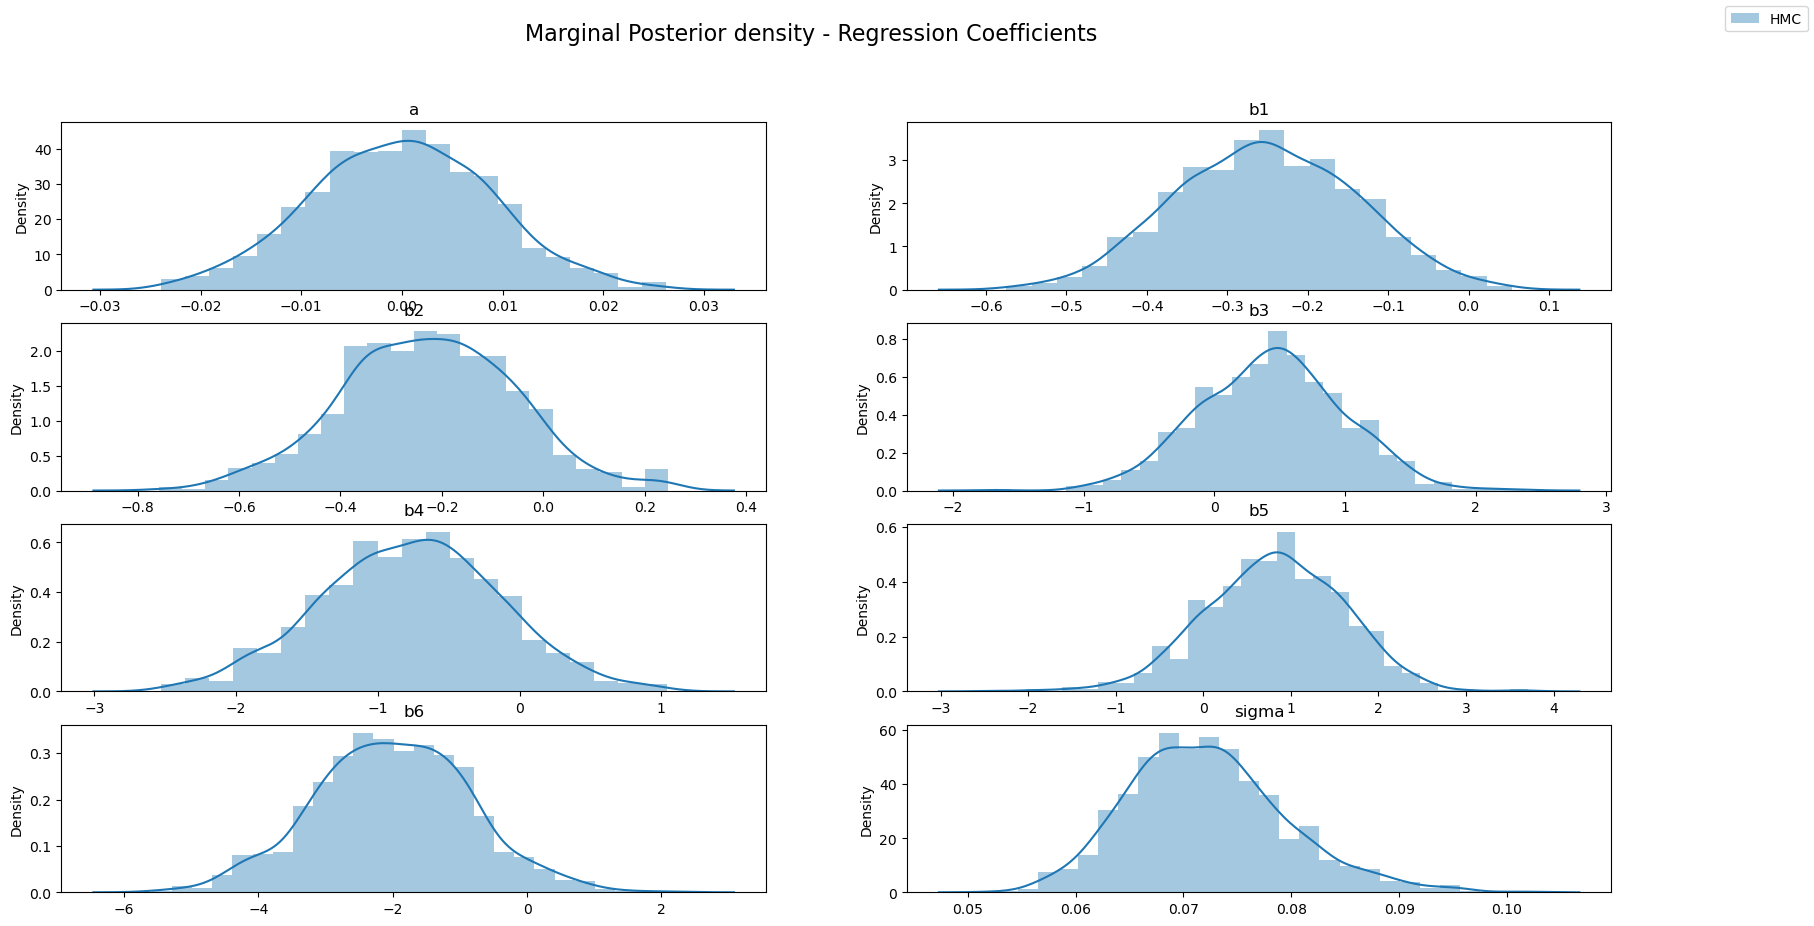

In [154]:
sites = ["a", "b1", "b2", "b3", "b4", "b5", "b6","sigma"]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
fig.suptitle("Marginal Posterior density - Regression Coefficients", fontsize=16)
for i, ax in enumerate(axs.reshape(-1)):
    site = sites[i]
    #sns.distplot(svi_samples[site], ax=ax, label="SVI (DiagNormal)")
    sns.distplot(hmc_samples[site], ax=ax, label="HMC")
    ax.set_title(site)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');

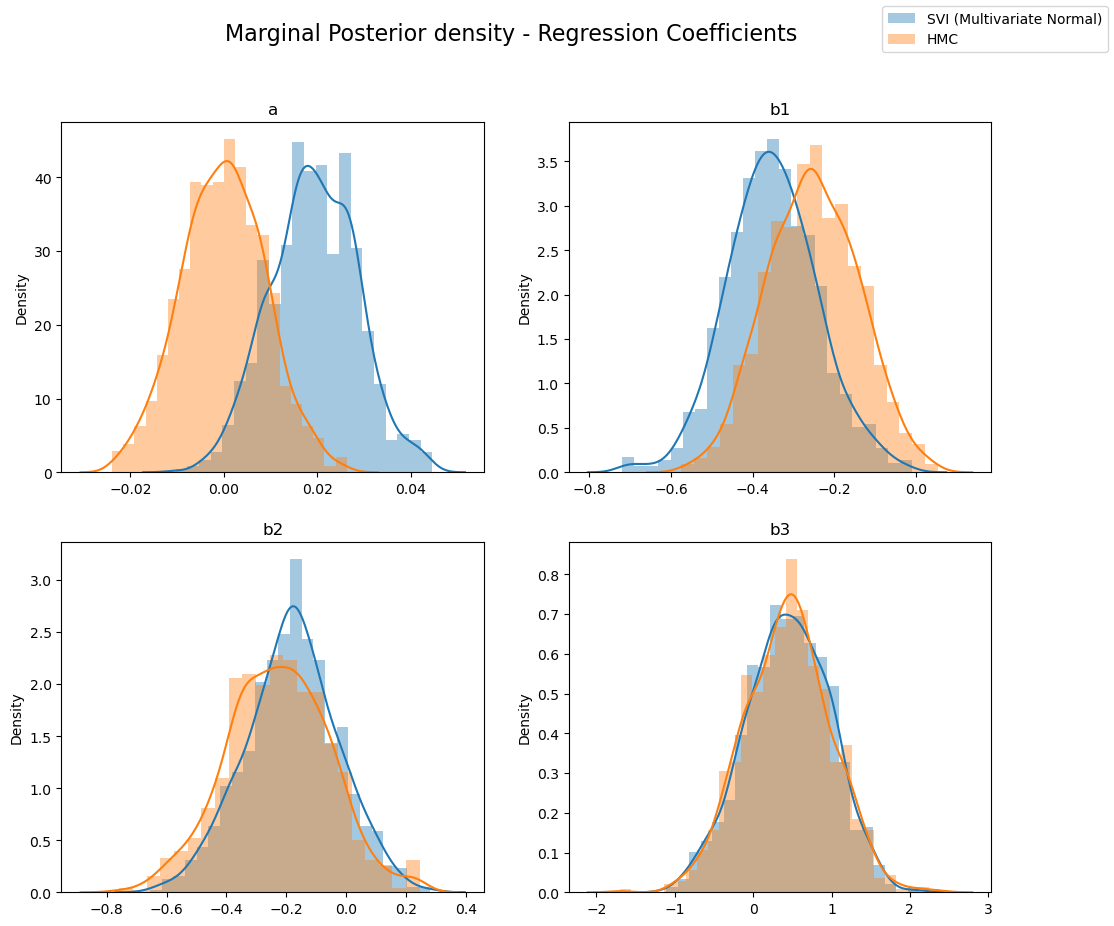

In [163]:
predictive = Predictive(model, guide=guide, num_samples=num_samples)
svi_mvn_samples = {k: v.reshape(num_samples).detach().cpu().numpy() 
                   for k, v in predictive(pc1_values_18, pc1_values_16, pc2_values_16, pc3_values_16, pc4_values_16, pc5_values_16, pc6_values_16).items()
                   if k != "obs"}
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Marginal Posterior density - Regression Coefficients", fontsize=16)
for i, ax in enumerate(axs.reshape(-1)):
    site = sites[i]
    sns.distplot(svi_mvn_samples[site], ax=ax, label="SVI (Multivariate Normal)")
    sns.distplot(hmc_samples[site], ax=ax, label="HMC")
    ax.set_title(site)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');